In [1]:
"""
Means-square displacement and diffusion-coefficients.

This python script analyses the position of a protein relative to the DNA axis and calculates its mean
square displacement. 

The input is a csv file that contains the distance from the DNA, the position along the DNA axis
and the angle relative to the DNA-axis (z-axis of the coordinate system) and the x-axis of the 
coordinate system.

"""

'\nMeans-square displacement and diffusion-coefficients.\n\nThis python script analyses the position of a protein relative to the DNA axis and calculates its mean\nsquare displacement. \n\nThe input is a csv file that contains the distance from the DNA, the position along the DNA axis\nand the angle relative to the DNA-axis (z-axis of the coordinate system) and the x-axis of the \ncoordinate system.\n\n'

In [2]:
import matplotlib.pyplot as plt
import glob
import sys
import pandas as pd
import numpy as np
#import sortednp as snp
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')
from matplotlib import rc
rc('font', family='helvetica')
import seaborn as sns
import time
import itertools
sns.set_context("paper")
sns.set(font_scale=0.9)
sns.set_style("white")

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
"Some colorbrewer colors you can use."
p1 = np.array([224/256, 236/256, 244/256, 1])
p2 = np.array([158/256, 160/256, 218/256, 1])
p3 = np.array([136/256, 86/256, 167/256, 1])
g1 = np.array([229/256, 245/256, 249/256, 1])
g2 = np.array([153/256, 216/256, 201/256, 1])
g3 = np.array([44/256, 162/256, 95/256, 1])
o1 = np.array([254/256, 232/256, 200/256, 1])
o2 = 'orange'
o3 = np.array([227/256, 74/256, 51/256, 1])

In [5]:
"""Define the folders with your input data."""
data_f = "/home/malinlu/elflab/Projects/MD_lacI/EXP-20-BV4000_CG_analysis/lacI_CG/data/published_data/" 
monomer= data_f + 'monomer_trajectories/'
dimer= data_f + 'dimer_trajectories/'
full_dimer= data_f + 'fullLacI_trajectories/trajectory_classify_diffusion/'

In [6]:
def import_displacement_csv_as_dataframe(file, nframes):
    """
    Import data from the displacement trajectory analysis.

    Parameter
    ---------
        file : str
            The folder location with the trajectory analysis output files containing distance,
            position and angle of the protein region of interetst relative to the DNA axis.
        nrows : int
            The number rows in the dataframe.

    Returns
    -------
        A pandas DataFrame table with columns
               'distance' (Å) ,'position' (Å),'angle' (degrees).
    """
    
    data = np.array(pd.read_csv(file,sep='\s+',header=None,nrows=nframes))
    
    d = {'distance': data[:,1],
        'position': data[:,0],
        'angle': data[:,2]*(180/np.pi)} #angle from radians to degrees
    dataframe=pd.DataFrame(d)
    #print(dataframe)
    return (dataframe)

class TrajectoryToDataFrame():
    """
    Class that obtains the analysis of the protein, either monomeric or dimeric, 
    in form of a pandas Dataframe 
    or a list of Dataframes for DNA-binding domains A and B in a dimer.
    
    Methods
    -------
    dimer(folder,nframes=100000)
        Analysis for dimeric DNA-binding proteins.
        
    monomer(folder,nframes=100000)
        Analysis for monomeric DNA-binding proteins.
        
    """
    
    def dimer(folder,nframes=100000):
        """Import data from the displacement trajectory analysis.

        Parameter
        ---------
            folder (str): The folder location with the displacement
                          trajectory analysis output files.
            nframes (int): number of frames to import

        Returns
        -------
            tuple: of two lists of pandas DataFrames with columns
                   'distance','position','angle'.
                   The two lists correspond to the monomer A and B.
        """

        filesA = sorted(glob.glob(folder+'*Displacement_H2A.txt'))
        filesB = sorted(glob.glob(folder+'*Displacement_H2B.txt'))
        if len(filesA) != len(filesB):
            raise ImportError('Number of files for A and B must be the same')
        dataframes = []
        files = (filesA,filesB)
        for i in range(2): #two times for dimer
            dataframes_ = []
            for file in files[i]:
                dataframes_.append(import_displacement_csv_as_dataframe(file,nframes))
            dataframes.append(dataframes_)

        return tuple(dataframes)
    
    def monomer(folder,nframes=100000):
        """Import data from the displacement trajectory analysis for the monomer.
        
        Parameter
        ---------
            folder (str): The folder location with the displacement
                          trajectory analysis output files named as
                          '*Displacement_*.txt' 
            nframes (int): number of frames to import

        Returns
        -------
            tuple: of two lists of pandas DataFrames with columns
                   'distance','position','angle'.
                   
        """

        files = sorted(glob.glob(folder+'*Displacement_*.txt'))

        dataframes = []
        files = files
        for file in files:
            dataframes.append(import_displacement_csv_as_dataframe(file,nframes))

        return tuple(dataframes)

In [7]:
monomerS001=TrajectoryToDataFrame.monomer(monomer+'S01/')
monomerS002=TrajectoryToDataFrame.monomer(monomer+'S02/')
monomerS003=TrajectoryToDataFrame.monomer(monomer+'S03/')
monomerS004=TrajectoryToDataFrame.monomer(monomer+'S04/')

monomerR001=TrajectoryToDataFrame.monomer(monomer+'R01/')
monomerR002=TrajectoryToDataFrame.monomer(monomer+'R02/')
monomerR003=TrajectoryToDataFrame.monomer(monomer+'R03/')
monomerR004=TrajectoryToDataFrame.monomer(monomer+'R04/')

dimerS001=TrajectoryToDataFrame.dimer(dimer+'S/001/')
dimerS002=TrajectoryToDataFrame.dimer(dimer+'S/002/')
dimerS003=TrajectoryToDataFrame.dimer(dimer+'S/003/')
dimerS004=TrajectoryToDataFrame.dimer(dimer+'S/004/')


dimerR001=TrajectoryToDataFrame.dimer(dimer+'R/001/')
dimerR002=TrajectoryToDataFrame.dimer(dimer+'R/002/')
dimerR003=TrajectoryToDataFrame.dimer(dimer+'R/003/')
dimerR004=TrajectoryToDataFrame.dimer(dimer+'R/004/')


In [8]:
full_dimerR001=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/01/')
full_dimerR002=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/02/')
full_dimerR003=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/03/')
full_dimerR004=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/04/')
full_dimerR005=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/05/')
full_dimerR006=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/06/')

full_dimerS001=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/01/')
full_dimerS002=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/02/')
full_dimerS003=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/03/')
full_dimerS004=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/04/')
full_dimerS005=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/05/')
full_dimerS006=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/06/')

In [9]:
class DiffusionCoefficients:
    """
    This classs calculates the mean square displacement from positions along the DNA 
    or from angles and estract diffusion coefficients.
    
    Attributes
    ----------
    input_dataframes: pd.Dataframe
    
    
    Methods
    -------
    
    mean_square_displacement(tau,position_values)
        calcualtes mean square displacement for one tau value
    
    msd_tau(position_values,max_tau)
        executes mean_square_displacement for a range of tau values
    
    msd_combine_replica(input_dataframes,max_tau=200)
        executes msd_tau for several replicas
    
    calculate_diffusion_coefficient(self,parameter,start,stop,max_tau=200)
    
    """
    
    

    def __init__(self,input_dataframes):
        self.input_dataframes=input_dataframes
        
    def mean_square_displacement(tau,position_values):
        """Calculated Mean square displacement with a certain tau value."""
        
        values = position_values[::1]
        len_values = len(values)
        ext_list_ = [np.diff(values[i::tau])**2 for i in list(range(0,len_values-tau,100))]
        diff_sq = np.concatenate(ext_list_,axis=0)
        MSD = np.mean(diff_sq)
        
        return(MSD)
    
    def msd_tau(position_values,max_tau):
        """Calculates the means sqaure displacement for tau values from 
        1 to X in steps of 1."""
        
        taus = np.arange(1,max_tau,1)
        MSDtau=[]
        for i in taus:
            msd = DiffusionCoefficients.mean_square_displacement(i,position_values)
            MSDtau.append(msd)
        return(MSDtau)
    
    def msd_combine_replica(self,parameter,max_tau=20):
        """Calculate the mean square displacement for several replicas of one system."""
        
        MSD=[]
        for i in range(len(self)):
            data = self[i][parameter]
            if parameter=='angle':
                data=np.unwrap(data)
            #print(data)
            MSD.append(DiffusionCoefficients.msd_tau(data,max_tau))
        return(MSD)
    
    def calculate_diffusion_coefficient(self,type_of_diffusion,start,stop,max_tau=200):
        """Calculate the diffusion coefficient from MSD.
        
        Dependencies
        ------------
        sklearn.linear_model.LinearRegression
        sklearn.metrics.mean_squared_error and r2_score
        
        Parameters
        ----------
        
        input_dataframes: list of pandas dataframes
            data output from TrajectoryToDataFrame
        parameter: str
            name of column in the dataframe to do the analysis on (e.g. 'position')
        start: int
            tau value where the linear fit begins.
        stop: int
            last tau value for the linear fit.
            
        Prints
        ------
        output of sklearn's regressions model
        Slope, Intercept, Root mean squared error, R2 score
        
        Returns
        -------
        
        The slope which is the diffusion coefficient.
        
        """
        

        #files = glob.glob(folder+'*MSD.txt')
        slope, D = [],[]
        for i in range(len(self)):
            data = self[i][type_of_diffusion]
            if type_of_diffusion=='angle':
                data=np.unwrap(data)
            MSD = DiffusionCoefficients.msd_tau(data,max_tau)
            
            y = MSD[start-1:stop]
            x = np.arange(start,stop+1).reshape(-1,1)

            # sckit-learn implementation
            # Model initialization
            regression_model = LinearRegression()

            # Fit the data(train the model)
            regression_model.fit(x, y)

            # Predict
            y_predicted = regression_model.predict(x)

            # model evaluation
            rmse = mean_squared_error(y, y_predicted)
            r2 = r2_score(y, y_predicted)

            # printing values
            print('Slope:' ,regression_model.coef_)
            print('Intercept:', regression_model.intercept_)
            print('Root mean squared error: ', rmse)
            print('R2 score: ', r2)

            slope.append(regression_model.coef_)

        slope = np.array(slope)
        D = slope/2  #in A^2 tu^-1
        print('Diffusion constant: ', D)
        return(D)
    
    def write_dataframe_diffusion_coefficient_vs_salt(data,protein,type_of_diffusion):
        """Combine all calculation of diffusion coefficients at different salt concentrations in on dataframe
        for monomers.
        
        Parameters
        ----------
        data: list
            diffusion coefficients for replica.
        protein: str
            description of the protein
        type_of_diffusion: str
            angular or translational diffusion coefficentes (options: 'translation','rotation')"""
        
        data={'salt':[0.01 for x in range(8)]+[0.02 for x in range(8)]+[0.03 for x in range(8)]+\
                    [0.04 for x in range(5)]+[0.05 for x in range(5)]+[0.06 for x in range(5)],\
                   'D':data[0].flatten().tolist()+\
                   data[1].flatten().tolist()+data[2].flatten().tolist()+data[3].flatten().tolist()\
                   +data[4].flatten().tolist()+data[5].flatten().tolist(),\
                  'data':[protein for x in range(3*8+3*5)]}
        df=pd.DataFrame(data)
        if type_of_diffusion == 'translation': 
            df['$D\ (\mu m^2 s^{-1})$']=df['D']*2*10**(-1)
        if type_of_diffusion == 'rotation': 
            df['$D_r\ (rad^2 s^{-1})$']=df['D']*(((np.pi/180)**2)*(2 * 10**(7)))
        return(df)

    def write_dataframe_diffusion_coefficient_vs_salt_dimer(data,protein,type_of_diffusion):
        """Combine all calculation of diffusion coefficients at different salt concentrations in on dataframe
        for dimer simulations.
        
        Parameters
        ----------
        data: list
            diffusion coefficients for replica.
        protein: str
            description of the protein
        type_of_diffusion: str
            angular or translational diffusion coefficentes (options: 'translation','rotation')"""
        
        data={'salt':[0.01 for x in range(5)]+[0.02 for x in range(5)]+[0.03 for x in range(5)]+\
                    [0.04 for x in range(5)]+[0.05 for x in range(5)]+[0.06 for x in range(5)],\
                   'D':data[0].flatten().tolist()+\
                   data[1].flatten().tolist()+data[2].flatten().tolist()+data[3].flatten().tolist()\
                   +data[4].flatten().tolist()+data[5].flatten().tolist(),\
                  'data':[protein for x in range(3*8+3*5)]}
        df=pd.DataFrame(data)
        if type_of_diffusion == 'translation': 
            df['$D\ (\mu m^2 s^{-1})$']=df['D']*2*10**(-1)
        if type_of_diffusion == 'rotation': 
            df['$D_r\ (rad^2 s^{-1})$']=df['D']*(((np.pi/180)**2)*(2 * 10**(7)))
        return(df)
    
    def write_dataframe_diffusion_coefficient_vs_salt_monomer(data,protein,type_of_diffusion):
        """Combine all calculation of diffusion coefficients at different salt concentrations in on dataframe 
        for monomer sumulations.
        
        Parameters
        ----------
        data: list
            diffusion coefficients for replica.
        protein: str
            description of the protein
        type_of_diffusion: str
            angular or translational diffusion coefficentes (options: 'translation','angle')"""
        
        data={'salt':[0.01 for x in range(5)]+[0.02 for x in range(5)]+[0.03 for x in range(5)]+\
                    [0.04 for x in range(5)],\
                   'D':data[0].flatten().tolist()+\
                   data[1].flatten().tolist()+data[2].flatten().tolist()+data[3].flatten().tolist(),\
                  'data':[protein for x in range(4*5)]}
        df=pd.DataFrame(data)
        if type_of_diffusion == 'translation': 
            df['$D\ (\mu m^2 s^{-1})$']=df['D']*2*10**(-1)
        if type_of_diffusion == 'rotation': 
            df['$D_r\ (rad^2 s^{-1})$']=df['D']*(((np.pi/180)**2)*(2 * 10**(7)))
        return(df)

In [10]:
DR1=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR001[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR2=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR002[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR3=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR003[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR4=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR004[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR5=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR005[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR6=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR006[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR1_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR001[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR2_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR002[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR3_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR003[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR4_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR004[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR5_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR005[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR6_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerR006[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS1=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS001[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS2=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS002[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS3=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS003[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS4=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS004[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS5=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS005[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS6=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS006[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS1_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS001[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS2_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS002[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS3_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS003[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS4_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS004[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS5_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS005[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS6_r=DiffusionCoefficients.calculate_diffusion_coefficient(full_dimerS006[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A

Slope: [0.12280614]
Intercept: 12.47627977238201
Root mean squared error:  0.10806937933734931
R2 score:  0.9961926405450997
Slope: [0.15329779]
Intercept: 9.789275353735786
Root mean squared error:  0.03122973659336035
R2 score:  0.9992917169873006
Slope: [0.1137991]
Intercept: 12.173950644848007
Root mean squared error:  0.1431193876842937
R2 score:  0.9941401501535239
Slope: [0.12739378]
Intercept: 12.177359439468228
Root mean squared error:  0.12716381963660367
R2 score:  0.9958382695214493
Slope: [0.12524727]
Intercept: 9.575256340785362
Root mean squared error:  0.02492877916829551
R2 score:  0.999153134297525
Slope: [0.11837121]
Intercept: 13.350387287962757
Root mean squared error:  0.17108886288451
R2 score:  0.9935296403473876
Slope: [0.14001136]
Intercept: 11.031926900648962
Root mean squared error:  0.1381975096693421
R2 score:  0.9962540513801755
Slope: [0.14631401]
Intercept: 8.961262925240678
Root mean squared error:  0.0517901468845185
R2 score:  0.9987113549405142
Diff

Slope: [2.74940989]
Intercept: -3.883373165703233
Root mean squared error:  0.42823096063192784
R2 score:  0.9999697862946484
Slope: [2.27426535]
Intercept: 23.044558322634714
Root mean squared error:  7.563095757852925
R2 score:  0.9992207141529181
Slope: [2.17793413]
Intercept: 16.255265706458772
Root mean squared error:  2.2056472498181536
R2 score:  0.9997520541122574
Slope: [2.36163939]
Intercept: 21.078682862793073
Root mean squared error:  5.300088345602529
R2 score:  0.9994934131570025
Diffusion constant:  [[1.36551839]
 [1.19027446]
 [1.24574142]
 [1.21326679]
 [1.37470495]
 [1.13713267]
 [1.08896707]
 [1.1808197 ]]
Slope: [2.22941859]
Intercept: 24.088729749170568
Root mean squared error:  9.112709115638909
R2 score:  0.9990230826505592
Slope: [1.48134923]
Intercept: 0.8712297524894268
Root mean squared error:  1.8554198073744783
R2 score:  0.9995492357171153
Slope: [1.23783083]
Intercept: 9.777351000480934
Root mean squared error:  3.7961920148588693
R2 score:  0.99868031555

Slope: [3.20100447]
Intercept: -11.009469028818444
Root mean squared error:  2.813611818984052
R2 score:  0.9998535646097356
Slope: [3.09849254]
Intercept: -8.6804731884244
Root mean squared error:  7.57481123979147
R2 score:  0.9995793642143577
Slope: [3.10091626]
Intercept: -3.4082275606656935
Root mean squared error:  4.789022576173603
R2 score:  0.9997344358231729
Slope: [3.1747207]
Intercept: -1.5878573010359105
Root mean squared error:  0.4332338469563115
R2 score:  0.9999770744688952
Slope: [2.97232205]
Intercept: 6.806179899272308
Root mean squared error:  2.4757206643527065
R2 score:  0.9998505613143324
Slope: [3.23216707]
Intercept: -0.26925615669756553
Root mean squared error:  4.325661140446801
R2 score:  0.9997792061249984
Slope: [3.03021266]
Intercept: 1.446611190162514
Root mean squared error:  8.706287119465303
R2 score:  0.9994945418242833
Slope: [2.97551499]
Intercept: 9.37508439087685
Root mean squared error:  3.2899488898994416
R2 score:  0.9998018487422988
Diffusio

In [11]:
D_full_dimer=pd.concat([DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt([DS1,DS2,DS3,DS4,DS5,DS6],\
                        'full dimer $search$','translation')\
                        ,DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt([DR1,DR2,DR3,DR4,DR5,DR6],\
                        'full dimer $recognition$','translation')])
D_r_full_dimer=pd.concat([DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt([DS1_r,DS2_r,DS3_r,DS4_r,DS5_r,DS6_r],'full dimer $search$','rotation')\
                        ,DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt([DR1_r,DR2_r,DR3_r,DR4_r,DR5_r,DR6_r],'full dimer $recognition$','rotation')])

In [12]:
DS1_DBD=DiffusionCoefficients.calculate_diffusion_coefficient(dimerS001[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS2_DBD=DiffusionCoefficients.calculate_diffusion_coefficient(dimerS002[0],'position',\
50,199,max_tau=200) #this is calculated for monomer A
DS3_DBD=DiffusionCoefficients.calculate_diffusion_coefficient(dimerS003[0],'position',\
50,199,max_tau=200) #this is calculated for monomer A
DS4_DBD=DiffusionCoefficients.calculate_diffusion_coefficient(dimerS004[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A

DS1_DBD_r=DiffusionCoefficients.calculate_diffusion_coefficient(dimerS001[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS2_DBD_r=DiffusionCoefficients.calculate_diffusion_coefficient(dimerS002[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS3_DBD_r=DiffusionCoefficients.calculate_diffusion_coefficient(dimerS003[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS4_DBD_r=DiffusionCoefficients.calculate_diffusion_coefficient(dimerS004[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A

DR1_DBD=DiffusionCoefficients.calculate_diffusion_coefficient(dimerR001[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR2_DBD=DiffusionCoefficients.calculate_diffusion_coefficient(dimerR002[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR3_DBD=DiffusionCoefficients.calculate_diffusion_coefficient(dimerR003[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR4_DBD=DiffusionCoefficients.calculate_diffusion_coefficient(dimerR004[0],'position',\
                50,199,max_tau=200) #this is calculated for monomer A

DR1_DBD_r=DiffusionCoefficients.calculate_diffusion_coefficient(dimerR001[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR2_DBD_r=DiffusionCoefficients.calculate_diffusion_coefficient(dimerR002[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR3_DBD_r=DiffusionCoefficients.calculate_diffusion_coefficient(dimerR003[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR4_DBD_r=DiffusionCoefficients.calculate_diffusion_coefficient(dimerR004[0],'angle',\
                50,199,max_tau=200) #this is calculated for monomer A

Slope: [0.72849471]
Intercept: 8.295916703980367
Root mean squared error:  0.1705636106995424
R2 score:  0.999828613278758
Slope: [0.65993132]
Intercept: 10.161283721110408
Root mean squared error:  0.2191538968028828
R2 score:  0.9997316799052437
Slope: [0.60338664]
Intercept: 11.885497107681019
Root mean squared error:  0.7192055762589658
R2 score:  0.9989474993946225
Slope: [0.62056229]
Intercept: 12.614258435077772
Root mean squared error:  0.24786861448170872
R2 score:  0.9996568217569798
Slope: [0.72679532]
Intercept: 8.716054159344921
Root mean squared error:  0.14322112379195573
R2 score:  0.9998554100663122
Diffusion constant:  [[0.36424735]
 [0.32996566]
 [0.30169332]
 [0.31028114]
 [0.36339766]]
Slope: [1.16093455]
Intercept: 8.65543359092112
Root mean squared error:  0.4624648162091743
R2 score:  0.9998170207752141
Slope: [1.15164056]
Intercept: 3.8488985167734313
Root mean squared error:  0.8905432473312518
R2 score:  0.9996419994951561
Slope: [1.10097037]
Intercept: 9.162

Slope: [3.48045104]
Intercept: -11.364896460942589
Root mean squared error:  24.67732969272229
R2 score:  0.9989146407404474
Slope: [2.11543508]
Intercept: 22.655300212682675
Root mean squared error:  26.179223250253376
R2 score:  0.9968895557100754
Diffusion constant:  [[1.08722595]
 [1.31628832]
 [1.1609023 ]
 [1.74022552]
 [1.05771754]]
Slope: [5.85415703]
Intercept: -28.529685472704045
Root mean squared error:  6.391735420341979
R2 score:  0.9999005362371586
Slope: [3.78987261]
Intercept: 0.47008703752464953
Root mean squared error:  4.422336566588791
R2 score:  0.9998358090235833
Slope: [6.56446065]
Intercept: 6.429454216728118
Root mean squared error:  20.10547304815308
R2 score:  0.9997512138685565
Slope: [7.71049656]
Intercept: -46.85331902774158
Root mean squared error:  12.421104432780025
R2 score:  0.9998885794863027
Slope: [3.84646233]
Intercept: -14.795674837351953
Root mean squared error:  6.87212310677987
R2 score:  0.9997523271403216
Diffusion constant:  [[2.92707852]
 

In [13]:
D_dimer=pd.concat([DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt_monomer([DS1_DBD,DS2_DBD,DS3_DBD,DS4_DBD]\
                        ,'dimer $search$','translation')\
                        ,DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt_monomer([DR1_DBD,DR2_DBD,DR3_DBD,DR4_DBD],\
                        'dimer $recognition$','translation')])
D_r_dimer=pd.concat([DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt_monomer([DS1_DBD_r,DS2_DBD_r,DS3_DBD_r,DS4_DBD_r],'dimer $search$','rotation')\
                        ,DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt_monomer([DR1_DBD_r,DR2_DBD_r,DR3_DBD_r,DR4_DBD_r],'dimer $recognition$','rotation')])

In [14]:
DS1_mono=DiffusionCoefficients.calculate_diffusion_coefficient(monomerS001,'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS2_mono=DiffusionCoefficients.calculate_diffusion_coefficient(monomerS002,'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS3_mono=DiffusionCoefficients.calculate_diffusion_coefficient(monomerS003,'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS4_mono=DiffusionCoefficients.calculate_diffusion_coefficient(monomerS004,'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DS1_mono_r=DiffusionCoefficients.calculate_diffusion_coefficient(monomerS001,'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS2_mono_r=DiffusionCoefficients.calculate_diffusion_coefficient(monomerS002,'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS3_mono_r=DiffusionCoefficients.calculate_diffusion_coefficient(monomerS003,'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DS4_mono_r=DiffusionCoefficients.calculate_diffusion_coefficient(monomerS004,'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR1_mono=DiffusionCoefficients.calculate_diffusion_coefficient(monomerR001,'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR2_mono=DiffusionCoefficients.calculate_diffusion_coefficient(monomerR002,'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR3_mono=DiffusionCoefficients.calculate_diffusion_coefficient(monomerR003,'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR4_mono=DiffusionCoefficients.calculate_diffusion_coefficient(monomerR004,'position',\
                50,199,max_tau=200) #this is calculated for monomer A
DR1_mono_r=DiffusionCoefficients.calculate_diffusion_coefficient(monomerR001,'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR2_mono_r=DiffusionCoefficients.calculate_diffusion_coefficient(monomerR002,'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR3_mono_r=DiffusionCoefficients.calculate_diffusion_coefficient(monomerR003,'angle',\
                50,199,max_tau=200) #this is calculated for monomer A
DR4_mono_r=DiffusionCoefficients.calculate_diffusion_coefficient(monomerR004,'angle',\
                50,199,max_tau=200) #this is calculated for monomer A



Slope: [1.564517]
Intercept: -4.520191499072951
Root mean squared error:  3.1039090977436357
R2 score:  0.9993241149855717
Slope: [1.30638774]
Intercept: 9.40464815586995
Root mean squared error:  0.41054444455983097
R2 score:  0.9998717142850799
Slope: [1.46440619]
Intercept: -2.0416319467836956
Root mean squared error:  1.112606173950507
R2 score:  0.9997233592050946
Slope: [1.55885371]
Intercept: 2.1280346309697507
Root mean squared error:  0.6813175245634862
R2 score:  0.9998504825333832
Slope: [1.31389794]
Intercept: 10.640983044728415
Root mean squared error:  1.1902981221388262
R2 score:  0.9996323870226418
Diffusion constant:  [[0.7822585 ]
 [0.65319387]
 [0.73220309]
 [0.77942685]
 [0.65694897]]
Slope: [1.87829826]
Intercept: 14.68149909161238
Root mean squared error:  2.2932521439068156
R2 score:  0.9996534306234582
Slope: [2.09685558]
Intercept: 2.8069514630704475
Root mean squared error:  1.3447455666504542
R2 score:  0.999836901384871
Slope: [1.81105425]
Intercept: 16.8256

Slope: [5.07875462]
Intercept: -57.926399086182755
Root mean squared error:  16.6543591735302
R2 score:  0.9996557436488537
Slope: [5.15249638]
Intercept: -70.96356075301026
Root mean squared error:  1.1669859765544686
R2 score:  0.9999765556554333
Diffusion constant:  [[2.945674  ]
 [2.49688655]
 [2.1361496 ]
 [2.53937731]
 [2.57624819]]
Slope: [6.23210014]
Intercept: -28.538047280146998
Root mean squared error:  79.55292712802509
R2 score:  0.9989087326584416
Slope: [7.61262868]
Intercept: -97.31581389676012
Root mean squared error:  15.853605801192167
R2 score:  0.9998541140626032
Slope: [7.91643761]
Intercept: -108.25489711137743
Root mean squared error:  16.89793473514387
R2 score:  0.9998562096899526
Slope: [6.98475272]
Intercept: -68.1587977490401
Root mean squared error:  35.13080414628917
R2 score:  0.9996160830516237
Slope: [6.5542908]
Intercept: -38.99548642242928
Root mean squared error:  5.774143702911282
R2 score:  0.9999283158611206
Diffusion constant:  [[3.11605007]
 [3

In [15]:
D_monomer=pd.concat([DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt_monomer([DS1_mono,DS2_mono,DS3_mono,DS4_mono],'monomer $search$','translation')\
                        ,DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt_monomer([DR1_mono,DR2_mono,DR3_mono,DR4_mono],'monomer $recognition$','translation')])
D_r_monomer=pd.concat([DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt_monomer([DS1_mono_r,DS2_mono_r,DS3_mono_r,DS4_mono_r],'monomer $search$','rotation')\
                        ,DiffusionCoefficients.write_dataframe_diffusion_coefficient_vs_salt_monomer([DR1_mono_r,DR2_mono_r,DR3_mono_r,DR4_mono_r],'monoer $recognition$','rotation')])

In [16]:
def pitch_from_diffusion(translational,rotational):
    """Calculate the pitch as the square root of the fraction of translational and rotational diffusione coefficient
    
    Parameter
    ---------
    translational: pandas DataFrame
        salt	D	data	 𝐷 (𝜇𝑚2𝑠−1)
    rotational: pandas DataFrame
        salt	D	data	 𝐷𝑟 (𝑟𝑎𝑑2𝑠−1)
    Return
    ------
        df_all: pandas DataFrame
        salt	D	data	 𝐷 (𝜇𝑚2𝑠−1) 	pitch (bp)"""
    

    pitch=(np.sqrt(translational['$D\ (\mu m^2 s^{-1})$']/rotational['$D_r\ (rad^2 s^{-1})$']))*2*np.pi*(1/0.00023)
    # *3030 converts um^2 to bp
    df_all=translational.copy()
    df_all['$pitch\ (bp)$']=pitch
    df_all['$D_r\ (rad^2 s^{-1})$']=rotational['$D_r\ (rad^2 s^{-1})$']
    return(df_all)      

In [17]:
pitch_monomer=pitch_from_diffusion(D_monomer,D_r_monomer)
pitch_monomer['model']=['monomer' for x in range(len(pitch_monomer))]
pitch_dimer=pitch_from_diffusion(D_dimer,D_r_dimer)
pitch_dimer['model']=['dimer' for x in range(len(pitch_dimer))]
pitch_full=pitch_from_diffusion(D_full_dimer,D_r_full_dimer)
pitch_full['model']=['full-length' for x in range(len(pitch_full))]

In [18]:
all_pitches=pd.concat([pitch_full,pitch_dimer,pitch_monomer])
all_pitches

,salt,D,data,$D\ (\mu m^2 s^{-1})$,$pitch\ (bp)$,$D_r\ (rad^2 s^{-1})$,model
0,0.01,0.015988,full dimer $search$,0.003198,15.644043,9750.817213,full-length
1,0.01,0.014946,full dimer $search$,0.002989,15.373420,9438.548025,full-length
2,0.01,0.010281,full dimer $search$,0.002056,12.745478,9445.931091,full-length
3,0.01,0.018190,full dimer $search$,0.003638,16.755345,9670.752281,full-length
4,0.01,0.012341,full dimer $search$,0.002468,14.263187,9054.210746,full-length
...,...,...,...,...,...,...,...
15,0.04,2.945674,monomer $recognition$,0.589135,175.571691,14262.962998,monomer
16,0.04,2.496887,monomer $recognition$,0.499377,138.756279,19356.533525,monomer
17,0.04,2.136150,monomer $recognition$,0.427230,145.163849,15130.343016,monomer
18,0.04,2.539377,monomer $recognition$,0.507875,158.742649,15040.907883,monomer


In [19]:
"Read data from table instead of generating"
pd.read_csv(data_f+"MSDdataAll.xlsx", sep="/+s")

/home/malinlu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


ParserError: Expected 1 fields in line 21, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [38]:
"""Experimental values based on
Marklund, E. et al. (2020). Nature
Nature. https://doi.org/10.1038/s41586-020-2413-7"""

xD = np.random.normal(loc=0.035, scale=0.002, size=20)
xDr = np.random.normal(loc=9000, scale=0.00, size=20)
xp= np.random.normal(loc=39, scale=9, size=20)
DF_exp=pd.DataFrame({'$D\ (\mu m^2 s^{-1})$':xD,'$D_r\ (rad^2 s^{-1})$':xDr,\
            '$pitch\ (bp)$':xp,'Salt (M)':[0.016 for x in range(len(xD))],
            'data':['experimental' for x in range(len(xD))],'model':['none' for x in range(len(xD))]})
#0.016

In [39]:
DF_exp

,$D\ (\mu m^2 s^{-1})$,$D_r\ (rad^2 s^{-1})$,$pitch\ (bp)$,Salt (M),data,model
0,0.033101,9000.0,45.448230,0.016,experimental,none
1,0.034212,9000.0,31.034944,0.016,experimental,none
2,0.031874,9000.0,27.941878,0.016,experimental,none
3,0.034404,9000.0,51.381408,0.016,experimental,none
4,0.034769,9000.0,42.875063,0.016,experimental,none
5,0.038014,9000.0,51.501262,0.016,experimental,none
6,0.036627,9000.0,42.847582,0.016,experimental,none
7,0.035870,9000.0,43.523544,0.016,experimental,none
8,0.036581,9000.0,29.840187,0.016,experimental,none
9,0.034806,9000.0,42.239699,0.016,experimental,none


In [22]:
figure_f = '/home/malinlu/elflab/Projects/MD_lacI/EXP-20-BV4000_CG_analysis/lacI_CG/data/published_data/Figures'

In [25]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

#change_width(b, .000)

<AxesSubplot:xlabel='Salt (M)', ylabel='$pitch\\ (bp)$'>

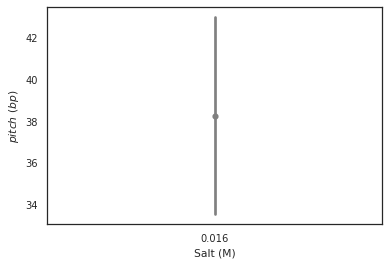

In [26]:
sns.pointplot(x='Salt (M)',y='$pitch\ (bp)$',data=DF_exp,alpha=1,color='grey',error=('se', 95), \
                  scale=0.7,markers='o')

In [40]:
all_pitches_1 = all_pitches.rename(columns={"salt":"Salt (M)"})
all_pitches_2 = all_pitches_1.drop(columns=["D"])

In [41]:
all_pitches_2

,Salt (M),data,$D\ (\mu m^2 s^{-1})$,$pitch\ (bp)$,$D_r\ (rad^2 s^{-1})$,model
0,0.01,full dimer $search$,0.003198,15.644043,9750.817213,full-length
1,0.01,full dimer $search$,0.002989,15.373420,9438.548025,full-length
2,0.01,full dimer $search$,0.002056,12.745478,9445.931091,full-length
3,0.01,full dimer $search$,0.003638,16.755345,9670.752281,full-length
4,0.01,full dimer $search$,0.002468,14.263187,9054.210746,full-length
...,...,...,...,...,...,...
15,0.04,monomer $recognition$,0.589135,175.571691,14262.962998,monomer
16,0.04,monomer $recognition$,0.499377,138.756279,19356.533525,monomer
17,0.04,monomer $recognition$,0.427230,145.163849,15130.343016,monomer
18,0.04,monomer $recognition$,0.507875,158.742649,15040.907883,monomer


In [42]:
all_pitches_3 = all_pitches_2.append(DF_exp)

In [43]:
all_pitches_3

,Salt (M),data,$D\ (\mu m^2 s^{-1})$,$pitch\ (bp)$,$D_r\ (rad^2 s^{-1})$,model
0,0.010,full dimer $search$,0.003198,15.644043,9750.817213,full-length
1,0.010,full dimer $search$,0.002989,15.373420,9438.548025,full-length
2,0.010,full dimer $search$,0.002056,12.745478,9445.931091,full-length
3,0.010,full dimer $search$,0.003638,16.755345,9670.752281,full-length
4,0.010,full dimer $search$,0.002468,14.263187,9054.210746,full-length
...,...,...,...,...,...,...
15,0.016,experimental,0.035612,39.491129,9000.000000,none
16,0.016,experimental,0.037598,38.735001,9000.000000,none
17,0.016,experimental,0.035384,28.846682,9000.000000,none
18,0.016,experimental,0.034820,49.211616,9000.000000,none


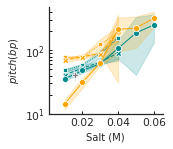

In [55]:
custom_palette = sns.color_palette(["lightblue","lightpink","dodgerblue","red","cyan","darkorange"])

fig=plt.subplots(figsize = (2.5,2.2))

g=sns.lineplot(data=all_pitches_3,x='Salt (M)',y='$pitch\ (bp)$',hue='data'\
              ,linewidth=1,palette=['darkcyan',o2,'darkcyan',o2,'darkcyan',o2,'gray'],style="model",\
               markers=True,ci='sd',err_style='band',\
             hue_order=['monomer $recognition$','monomer $search$',\
                        'dimer $recognition$','dimer $search$',\
                        'full dimer $recognition$','full dimer $search$','experimental'])

#c = sns.pointplot(x='Salt (M)',y='$pitch\ (bp)$',data=DF_exp,alpha=1,color='grey',error=('se', 95), \
                  #scale=0.7,markers='o')


plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')

g.set(yscale='log')
#c.set(yscale='log')

plt.ylabel('$pitch (bp)$', fontsize = 10)
plt.xlabel('Salt (M)', fontsize = 10)

#g.set_xticks((0,0.02,0.04,0.06),(0,0.02,0.04,0.06))
#b.set_xticks((0,0.02,0.04,0.06),(0,0.02,0.04,0.06))

plt.xlim(0.001,0.065)
plt.xticks([0.02,0.04,0.06],[0.02,0.04,0.06])

sns.despine()
#plt.ylim(-5,120)
plt.tight_layout()
plt.savefig(figure_f + '/Fig3/pitch_all.pdf',dpi=400,transparent=True)

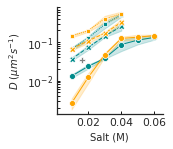

In [51]:
custom_palette = sns.color_palette(["lightblue","lightpink","dodgerblue","red","cyan","darkorange"])
fig=plt.subplots(figsize = (2.5,2.2))
#fig=plt.subplots(figsize = (5,5.0))
#b=sns.lineplot(x='salt',y='$D\ (\mu m^2 s^{-1})$',data=DF_exp,alpha=0.7,color='grey',markers=True,ci='sd',linewidth=1)


g=sns.lineplot(data=all_pitches_3,x='Salt (M)',y='$D\ (\mu m^2 s^{-1})$',hue='data'\
              ,linewidth=1,palette=['darkcyan',o2,'darkcyan',o2,'darkcyan',o2,"gray"],style="model",markers=True,\
               ci='sd',err_style='band',\
             hue_order=['monomer $recognition$','monomer $search$',\
                        'dimer $recognition$','dimer $search$',\
                        'full dimer $recognition$','full dimer $search$', 'experimental'])

#b = sns.pointplot(x='Salt (M)',y='$D\ (\mu m^2 s^{-1})$',data=DF_exp,alpha=1,color='grey',error=('se', 95), scale=0.7,markers='o')


plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
#plt.title('full dimer')

sns.despine()
g.set(yscale='log')
plt.ylabel('$D\ (\mu m^2 s^{-1})$', fontsize = 10)
plt.xlabel('Salt (M)', fontsize = 10)
#plt.ylim(-5,120)
#plt.xlim(0.008,0.045)
#plt.xticks((0.01,0.02,0.03,0.04),(0.01,0.02,0.03,0.04))
plt.xlim(0.001,0.065)

plt.xticks((0.02,0.04,0.06),(0.02,0.04,0.06))
plt.tight_layout()
plt.savefig(figure_f + '/Fig3/D_translation_all_legend.pdf',dpi=400,transparent=True)

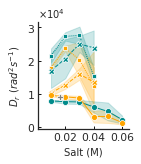

In [53]:
custom_palette = sns.color_palette(["lightblue","lightpink","dodgerblue","red","cyan","darkorange"])

fig=plt.subplots(figsize = (2.5,2.2))
#b=sns.lineplot(x='salt',y='$D_r\ (rad^2 s^{-1})$',data=DF_exp,alpha=0.7,color='grey',markers=True,ci='sd',linewidth=1)
g=sns.lineplot(data=all_pitches_3,x='Salt (M)',y='$D_r\ (rad^2 s^{-1})$',hue='data'\
              ,linewidth=1,palette=['darkcyan',o2,'darkcyan',o2,'darkcyan',o2, "gray"],style="model",markers=True,ci='sd',err_style='band',\
             hue_order=['monomer $recognition$','monomer $search$',\
                        'dimer $recognition$','dimer $search$',\
                        'full dimer $recognition$','full dimer $search$', "experimental"])

#b = sns.pointplot(x='Salt (M)',y='$D_r\ (rad^2 s^{-1})$',data=DF_exp,alpha=1,color='grey',error=('se', 95), scale=0.7,markers='o')


plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
#plt.title('full dimer')
plt.tight_layout()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
g.yaxis.set_major_formatter(formatter) 

sns.despine()
#plt.ylim(-5,120)
#plt.xlim(0.008,0.045)
#plt.xticks((0.01,0.02,0.03,0.04),(0.01,0.02,0.03,0.04))
plt.ylabel('$D_r\ (rad^2 s^{-1})$', fontsize = 10)
plt.xlabel('Salt (M)', fontsize = 10)

plt.xlim(0.001,0.065)
plt.xticks((0.02,0.04,0.06),(0.02,0.04,0.06))

plt.savefig(figure_f + '/Fig3/D_rotation_all.pdf',dpi=400,transparent=True)

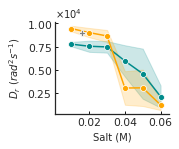

In [60]:
fig=plt.subplots(figsize = (2.5,2.2))
#b=sns.lineplot(x='salt',y='$D_r\ (rad^2 s^{-1})$',data=DF_exp,alpha=0.7,color='grey')
g=sns.lineplot(x='Salt (M)',y='$D_r\ (rad^2 s^{-1})$',hue='data',data=all_pitches_3,palette=['darkcyan',o2,'gray'],\
               style="model",markers=True,ci='sd',hue_order=['full dimer $recognition$','full dimer $search$','experimental'])

#b = sns.pointplot(x='Salt (M)',y='$D_r\ (rad^2 s^{-1})$',data=DF_exp,alpha=1,color='grey',error=('se', 95), scale=0.7,markers='o')


plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
sns.despine()
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
g.yaxis.set_major_formatter(formatter) 
plt.ylabel('$D_r\ (rad^2 s^{-1})$', fontsize = 10)
plt.xlabel('Salt (M)', fontsize = 10)
plt.xticks((0.02,0.04,0.06),(0.02,0.04,0.06))
plt.xlim(0.001,0.065)
plt.tight_layout()
plt.savefig(figure_f + '/Fig3/full_dimer_rotational.pdf',dpi=400,transparent=True)

In [ ]:
def write_dataframe_to_excel_sheet(dataframe,name):  
    """Write a pandas dataframe to a excel sheet.
    
    Define the path for the output in a certain protject.
    
    Parameters
    ----------
    dataframe: pandas dataframe
    name: str
        name for the file"""
    
    writer = pd.ExcelWriter(data_f+name+'.xlsx', engine='openpyxl')
    dataframe.to_excel(writer,'Sheet1')
    writer.save()

In [ ]:
write_dataframe_to_excel_sheet(all_pitches, "MSDdataAll")

In [ ]:
D_r_full_dimer[D_r_full_dimer['data']=='full dimer $search$']

In [ ]:
write_dataframe_to_excel_sheet(D_full_dimer[D_full_dimer['data']=='full dimer $search$'].groupby('salt').mean(),'full_dimer_translational_mean')

In [ ]:
write_dataframe_to_excel_sheet(D_full_dimer[D_full_dimer['data']=='full dimer $recognition$'].groupby('salt').mean(),'full_dimer_translaional_mean_R')

In [ ]:
#fig=plt.subplots(figsize = (2.2,2.))
fig=plt.subplots(figsize = (2.5,2.2))

b=sns.lineplot(x='salt',y='$D\ (\mu m^2 s^{-1})$',data=DF_exp,alpha=0.7,color='grey',markers=True,ci='sd')
g=sns.lineplot(x='salt',y='$D\ (\mu m^2 s^{-1})$',hue='data',data=pitch_full,palette=['darkcyan',o2],style="model",\
               markers=True,ci='sd',hue_order=['full dimer $recognition$','full dimer $search$'])
g.set(yscale='log')
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')

sns.despine()
plt.tight_layout()
plt.xticks((0.02,0.04,0.06),(0.02,0.04,0.06))
#plt.savefig(\
#'/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure4/full_dimer_translational'\
 #           ,dpi=300,transparent=True)



fig=plt.subplots(figsize = (2.5,2.2))
b=sns.lineplot(x='salt',y='$pitch\ (bp)$',data=DF_exp,alpha=0.7,color='grey',markers=True,ci='sd')
g=sns.lineplot(x='salt',y='$pitch\ (bp)$',hue='data',data=pitch_full\
,palette=['darkcyan',o2],style="model",markers=True,ci='sd',hue_order=\
               ['full dimer $recognition$','full dimer $search$'])
g.set(yscale='log')
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
#plt.title('full dimer')
plt.tight_layout()
sns.despine()
#plt.ylim(-5,120)
plt.xlim(0.008,0.045)
plt.xticks((0.02,0.04,0.06),(0.02,0.04,0.06))
plt.savefig\
('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure4/pitch'\
            ,dpi=600,transparent=True)

In [ ]:
fig=plt.subplots(figsize = (3.5,2.6),frameon=False,edgecolor='white')
b=sns.lineplot(x='salt',y='$pitch\ (bp)$',data=DF_exp,alpha=0.7,color='white',markers=True,ci='sd')
g=sns.lineplot(x='salt',y='$pitch\ (bp)$',hue='data',data=pitch_full,palette=['cyan','orange'],style="model",markers=True,ci='sd',hue_order=['full dimer $recognition$','full dimer $search$'])
#plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='white',direction ='in')
#plt.title('full dimer')
plt.legend(title='conformation',edgecolor='white',loc='upper left',bbox_to_anchor=(1., 1.15),
           markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3)
sns.despine()
plt.ylim(-5,220)
plt.xlim(0.008,0.045)
plt.xticks((0.01,0.02,0.03,0.04,0.05,0.06),(0.01,0.02,0.03,0.04,0.05,0.06),fontsize = 16,color='white',rotation=35)
plt.yticks(fontsize = 16,color='white')

plt.ylabel('pitch (bp)',fontsize = 16,color='white')
plt.xlabel('salt',fontsize = 16,color='white')
plt.tight_layout()
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure4/pitch_presi_leg',dpi=300,transparent=True)

In [ ]:
pitch_dimer

In [ ]:
DF_exp[:32]

In [ ]:
fig=plt.subplots(figsize = (2.5,2.0))
b=sns.lineplot(x='salt',y='$D\ (\mu m^2 s^{-1})$',data=DF_exp[:32],alpha=0.7,color='grey',markers=True,ci='sd')
g=sns.lineplot(x='salt',y='$D\ (\mu m^2 s^{-1})$',hue='data',data=pitch_dimer,palette=['darkcyan',o2],style="model",\
               markers=True,ci='sd',hue_order=['dimer $recognition$','dimer $search$'])
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
plt.title('DBD dimer')
plt.tight_layout()
sns.despine()
g.set(yscale='log')
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure2/dimer_translational',dpi=300,transparent=True)

fig=plt.subplots(figsize = (2.5,2.0))
b=sns.lineplot(x='salt',y='$D_r\ (rad^2 s^{-1})$',data=DF_exp[:32],alpha=0.7,color='grey')
g=sns.lineplot(x='salt',y='$D_r\ (rad^2 s^{-1})$',hue='data',data=pitch_dimer,palette=['darkcyan',o2],\
               style="model",markers=True,ci='sd',hue_order=['dimer $recognition$','dimer $search$'])
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
sns.despine()
plt.title('DBD dimer')
plt.tight_layout()

plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure2/dimer_rotational',dpi=300,transparent=True)

fig=plt.subplots(figsize = (2.5,2.0))
b=sns.lineplot(x='salt',y='$pitch\ (bp)$',data=DF_exp[:32],alpha=0.7,color='grey')
g=sns.lineplot(x='salt',y='$pitch\ (bp)$',hue='data',data=pitch_dimer,palette=['darkcyan',o2],\
               style="model",markers=True,ci='sd',hue_order=['dimer $recognition$','dimer $search$'])
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
sns.despine()
plt.ylim(-5,120)
plt.title('DBD dimer')
plt.tight_layout()

plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure2/dimer_pitch',dpi=300,transparent=True)

In [ ]:
fig=plt.subplots(figsize = (2.5,2.0))
b=sns.lineplot(x='salt',y='$D\ (\mu m^2 s^{-1})$',data=DF_exp[:32],alpha=0.7,color='grey',markers=True,ci='sd')
g=sns.lineplot(x='salt',y='$D\ (\mu m^2 s^{-1})$',hue='data',data=pitch_monomer,palette=['darkcyan',o2],style="model",\
               markers=True,ci='sd',hue_order=['monomer $recognition$','monomer $search$'])
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
plt.title('monomer')
plt.tight_layout()
sns.despine()
g.set(yscale='log')
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure2/monomer_translational',dpi=300,transparent=True)

fig=plt.subplots(figsize = (2.5,2.0))
b=sns.lineplot(x='salt',y='$D_r\ (rad^2 s^{-1})$',data=DF_exp[:32],alpha=0.7,color='grey')
g=sns.lineplot(x='salt',y='$D_r\ (rad^2 s^{-1})$',hue='data',data=pitch_monomer,palette=['darkcyan',o2],\
               style="model",markers=True,ci='sd',hue_order=['monomer $recognition$','monomer $search$'])
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
sns.despine()
plt.title('monomer')
plt.tight_layout()

plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure2/monomer_rotational',dpi=300,transparent=True)

fig=plt.subplots(figsize = (2.5,2.0))
b=sns.lineplot(x='salt',y='$pitch\ (bp)$',data=DF_exp[:32],alpha=0.7,color='grey')
g=sns.lineplot(x='salt',y='$pitch\ (bp)$',hue='data',data=pitch_monomer,palette=['darkcyan',o2],\
               style="model",markers=True,ci='sd',hue_order=['monomer $recognition$','monomer $search$'])
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
sns.despine()
plt.ylim(-5,120)
plt.title('monomer')
plt.tight_layout()

plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure2/monomer_pitch',dpi=300,transparent=True)